<a href="https://colab.research.google.com/github/LeeSeungwon89/Deep-learning_Theory/blob/main/7-3%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EB%AA%A8%EB%8D%B8%20%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **7-3 신경망 모델 훈련**

## **손실 곡선**

케라스의 `fit()` 메서드는 `History` 클래스 인스턴스를 반환합니다. 이 인스턴스에 훈련 과정에서 계산한 지표(손실, 정확도)가 담겨 있습니다. 이 지표를 활용하여 그래프를 그릴 수 있습니다.

먼저 이전 챕터에서 사용했던 패션 MNIST 데이터 세트를 준비하겠습니다.

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target,
                                                                      test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


모델을 생성하는 함수를 선언해 보겠습니다.

In [2]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

if 구문은 렐루 함수를 적용한 은닉층 뒤에 다른 층 하나를 추가합니다. 

선언한 함수를 호출하여 이전 챕터에서 생성했던 모델을 동일하게 생성해 보겠습니다(`a_layer` 매개변수에 새로운 층을 추가하지 않습니다).

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


`fit()` 메서드의 결과를 `history` 변수에 담고 내용을 확인해 보겠습니다.

In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# `verbose` 매개변수의 경우 디폴트 `1`은 에포크마다 진행 막대 및 손실 등 지표가 출력되고,
# `2`는 진행 막대는 제외하고 출력하며, `0`은 훈련 과정을 생략합니다.
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

print(history)
print(history.history)
print(history.history.keys())

{'loss': [0.5291024446487427, 0.39143067598342896, 0.35455480217933655, 0.333158403635025, 0.31770461797714233], 'accuracy': [0.8146666884422302, 0.859333336353302, 0.8719375133514404, 0.8806041479110718, 0.8860833048820496]}
dict_keys(['loss', 'accuracy'])


`history` 속성은 손실과 정확도를 가집니다. 정확도는 `compile()` 메서드에 `'accuracy'`로 지정했으므로 속성에 포함된 것입니다.

이 속성에 포함된 내용을 그래프로 그려 보겠습니다.

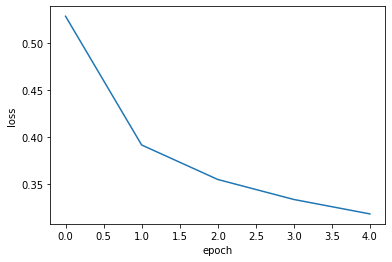

In [5]:
import matplotlib.pyplot as plt

# 손실을 그래프화합니다.
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

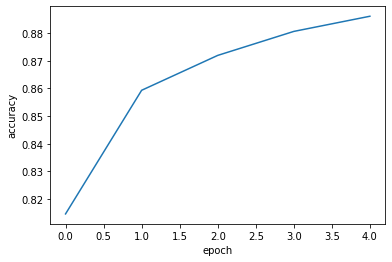

In [6]:
# 정확도를 그래프화합니다.
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

에포크가 증가할수록 성능이 증가합니다.

에포크를 20으로 늘린 결과를 그래프화해 보겠습니다.

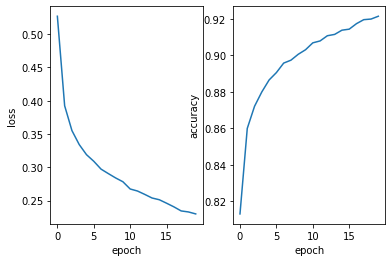

In [7]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## **검증 손실**

에포크에 따른 과적합을 판단하려면 검증 데이터 세트에 대한 점수 또한 고려해야 합니다. 인공 신경망 모델의 최적화 대상은 손실 함수입니다. 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있습니다. 따라서 모델 훈련 정도를 판단하려면 손실 함수 값을 확인하는 편이 좋습니다.

에포크마다 검증 손실을 계산하려면 `fit()` 메서드에 검증 데이터를 전달합니다. 코드로 먼저 예시하겠습니다.

In [8]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# `validation_data` 매개변수에 검증 데이터 세트를 튜플 형태로 지정합니다.
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
print(history.history)
print(history.history.keys())

{'loss': [0.5265119075775146, 0.39179638028144836, 0.3540659546852112, 0.3318682909011841, 0.3168381452560425, 0.3057212829589844, 0.29746630787849426, 0.28786808252334595, 0.28136810660362244, 0.2732239067554474, 0.26772505044937134, 0.26174384355545044, 0.2566438317298889, 0.2548021972179413, 0.24763506650924683, 0.2437933087348938, 0.24018195271492004, 0.2365282028913498, 0.23097996413707733, 0.2262219488620758], 'accuracy': [0.8141250014305115, 0.8588749766349792, 0.8730000257492065, 0.8803125023841858, 0.8859999775886536, 0.890333354473114, 0.895354151725769, 0.8974375128746033, 0.9007083177566528, 0.9043958187103271, 0.9052083492279053, 0.9087916612625122, 0.911104142665863, 0.9112083315849304, 0.914145827293396, 0.9163125157356262, 0.9175208210945129, 0.9192916750907898, 0.9197083115577698, 0.9223541617393494], 'val_loss': [0.42040055990219116, 0.3885265588760376, 0.3584778308868408, 0.3742852509021759, 0.3587069809436798, 0.36255908012390137, 0.36588001251220703, 0.358348757028

검증 데이터 세트에 대한 손실과 정확도가 추가됐습니다.

이 요소들을 그래프로 그려보겠습니다.

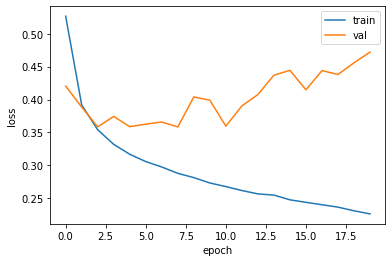

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

훈련 손실은 꾸준히 증가하는 반면 검증 손실은 일정 구간까지 하강하다가 상승합니다. 검증 손실이 상승하는 시점을 최대한 뒤로 늦추면 검증 손실이 줄어들고 정확도도 증가합니다.

과대적합을 막기 위한 여러 방법이 존재합니다. 그 중에 먼저 옵티마이저의 매개변수를 조정하여 과대적합을 완화해 보겠습니다. 기본 RMSprop 옵티마이저는 여러 케이스에서 잘 작동합니다만, 다른 옵티마이저를 적용한다면 우선 Adam을 선택하는 편이 좋습니다. Adam은 적응적 학습률을 사용하므로 에포크에 진행됨에 따라 학습률 크기를 조정합니다. 일단 Adam 옵티마이저를 적용해 보겠습니다.

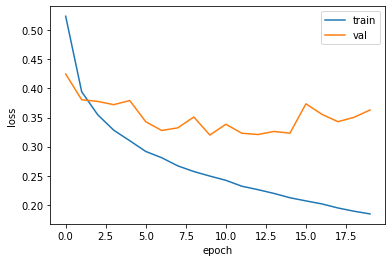

In [11]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

이전보다 검증 손실 그래프가 하강하고 있으며 과대적합이 많이 줄어들었습니다. Adam 옵티마이저가 적합한 것으로 사료됩니다. 여기서 추가로 더 해볼 수 있는 작업은 학습률 조정입니다. 일단 생략하고 넘어가겠습니다.

## **드롭아웃**

**드롭아웃(dropout)**은 훈련 과정에서 층에 존재하는 일부 유닛을 랜덤하게 꺼서(유닛의 출력을 0으로 만들어서) 과대적합을 방지합니다. 유닛을 랜덤하게 끈다는 것은 유닛을 랜덤하게 드롭아웃 한다는 것입니다. 얼마나 많은 유닛을 드롭할지 여부는 분석가가 직접 정해야 할 하이퍼파라미터입니다.

드롭아웃이 과대적합을 막는 이유는 이전 층의 특정 유닛에 과대하게 의존하는 것을 줄이며 모든 입력에 대해 주의를 기울이기 때문입니다. 드롭아웃을 적용하여 훈련을 수행하면 여러 신경망을 서로 앙상블 하는 것으로도 볼 수 있습니다. 머신러닝 분야에서 앙상블은 여러 모델을 훈련하여 과대적합을 막는 탁월한 방법입니다.

케라스는 드롭아웃을 `layers` 패키지의 `Dropout` 클래스로 구현합니다. 특정 층의 뒤에 드롭아웃을 둬서 이 특정 층의 출력을 랜덤하게 0으로 만드는 것입니다. 드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없습니다.

이제 앞에서 선언한 모델 생성 함수에 드롭아웃 객체를 전달하여 새로운 층을 추가해 보겠습니다.

In [3]:
# 드롭아웃 비율은 30%로 지정합니다.
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


은닉층 뒤에 드롭아웃 층이 추가됐습니다. 입출력 크기는 은닉층과 같으며 파라미터는 0입니다. 일부 유닛의 출력을 0으로 만들지만 전체 출력 배열 크기는 그대로 둡니다. 드롭 아웃을 수행하지 않는 유닛의 출력은 1/(1-드롭아웃 할 비율)만큼 증가시켜 출력 총합이 같게 합니다.

참고로 훈련을 마치고 평가와 예측을 수행할 때 드롭아웃을 적용해서는 안 됩니다. 훈련된 모든 유닛을 사용해야 바른 예측을 수행할 수 있습니다. 다만 이를 위해 별도로 드롭아웃 층을 뺄 필요는 없습니다. 텐서플로와 케라스는 평가와 예측을 수행할 때 자동으로 드롭아웃을 적용하지 않습니다.

훈련 손실과 검증 손실 그래프를 다시 그려보겠습니다.

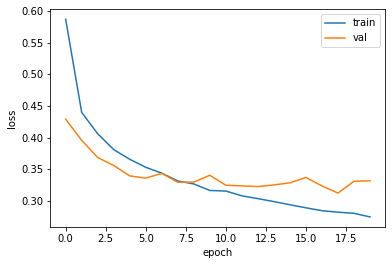

In [7]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target,
                                                                      test_size=0.2, random_state=42)

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

전보다 과대적합을 잘 제어합니다. 특정 지점에서 검증 손실의 하강이 멈추지만 대체적으로 흐름을 유지합니다. 다만 에포크를 20으로 지정하여 훈련했으므로 에포크를 낮춰서 과대적합을 극복할 필요가 있습니다.

## **모델 저장과 복원**

에포크를 10으로 낮춰서 모델을 훈련해 보겠습니다.

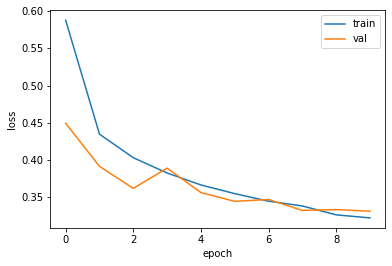

In [8]:
model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대적합이 많이 개선됐습니다.

이 모델을 추후 사용하려면 모델을 저장해 둬야 합니다. 훈련된 모델의 파라미터를 저장하는 메서드는 `save_weights()`입니다. 모든 층의 가중치와 절편을 파일로 저장하는 용도입니다. 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만 파일 확장자가 `.h5`라면 HDF5 포맷으로 저장합니다.

In [9]:
model.save_weights('model-weights.h5')

아울러 모델 구조와 파라미터를 함께 저장하는 `save()` 메서드도 있습니다. 모델 구조와 모든 가중치와 절편을 파일로 저장하는 용도입니다. 이 메서드는 텐서플로의 SavedModel 포맷으로 저장하지만 파일 확장자가 `.h5`라면 HDF5 포맷으로 저장합니다.

In [10]:
model.save('model-whole.h5')

파일들이 잘 생성됐는지 확인해 보겠습니다.

In [11]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Aug 28 10:08 model-weights.h5
-rw-r--r-- 1 root root 982664 Aug 28 10:10 model-whole.h5


저장된 두 파일을 가지고 몇 가지 시도를 해보겠습니다. 먼저 훈련하지 않은 새 모델을 생성한 뒤 파라미터만 저장된 파일을 적용해 보겠습니다. 파일을 적용하려면 `load_weights()` 메서드를 사용합니다.

In [12]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

검증 정확도를 확인해 보겠습니다. 케라스에서 예측을 수행하는 메서드는 `predict()`입니다. 사이킷런과 차이점은 샘플마다 클래스 10개에 대한 확률을 반환하는 것입니다. 사용 중인 데이터 세트는 다중 분류 문제이기 때문입니다. 만약 이중 분류 문제였다면 양성 클래스의 확률만 반환합니다.

검증 데이터 세트의 샘플 개수는 12,000개입니다. 따라서 `predict()` 메서드는 `(12000, 0)` 배열을 반환할 것입니다. 확률 10개 중에 가장 큰 값의 인덱스를 선정하여 타깃 레이블과 비교하고 정확도를 산출해 보겠습니다. 참고로 `evaluate()` 메서드를 사용해도 정확도를 출력할 수도 있으나 이 메서드를 사용하려면 먼저 `compile()` 메서드를 사용하여 손실을 계산해야 합니다.

In [15]:
import numpy as np

# 넘파이의 `argmax()` 메서드를 사용하여 가장 큰 값의 인덱스를 추출합니다.
# `axis=-1`은 배열의 마지막 차원을 따라 최댓값을 고릅니다.
# 검증 세트는 2차원 배열이므로 마지막 차원은 1입니다.
# `axis=0`은 행을 따라 각 열의 최댓값의 인덱스를 선택하고,
# 마지막 차원인 `axis=1`은 열을 따라 각 행의 최댓값의 인덱스를 선택합니다.
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# 인덱스와 타깃을 비교합니다. 위치 값이 같으면 1, 다르면 0이며, 이를 평균하면 정확도가 됩니다.
print(np.mean(val_labels == val_target))

0.8801666666666667


전체 모델을 파일에서 읽고 검증 세트의 정확도를 출력해 보겠습니다. 모델이 저장된 파일을 읽는 메서드는 `load_model()`입니다.

In [16]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3310 - accuracy: 0.8802


[0.33100634813308716, 0.8801666498184204]

정확도가 같습니다. 참고로 모델 파라미터와 모델 구조, 옵티마이저 상태까지 모두 복원했으므로 `evaluate()` 메서드를 사용할 수 있습니다.

## **콜백**

이전 챕터에서 과대적합되지 않도록 에포크를 10으로 낮춰서 다시 훈련했습니다. 처음 에포크를 20으로 두고 훈련했다가 10으로 낮춰서 훈련했으므로 총 두 번 훈련한 셈입니다. 이는 매우 번거로운 수행 과정이므로 모델을 한번만 훈련하기 위해 **콜백(callback)**을 사용하면 좋습니다. 콜백은 훈련 과정 중에 여러 작업을 수행할 수 있도록 하는 객체이며 `callbacks` 패키지에 포함된 클래스들입니다. `fit()` 메서드의 `callbacks` 매개변수에 리스트로 전달하여 지정합니다. 위 파트보다 간편한 방법입니다.

아래에서 사용할 `ModelCheckpoint` 콜백 클래스는 최상의 검증 점수를 만드는 모델과 가중치를 일정 간격으로 저장합니다. 관련 매개변수는 아래와 같습니다.

- `monitor`: 모니터링할 지표입니다. 디폴트는 `val_loss`이며 검증 손실을 관찰합니다.

- `save_weights_only`: 모델의 가중치와 절편의 저장 여부입니다. 디폴트는 `True`이며 일부 모델만 저장하고, `False`로 지정하면 전체 모델을 저장합니다.

코드로 구현해 보겠습니다.

In [18]:
model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# `ModelCheckpoint` 클래스의 인스턴스를 생성합니다.
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
# `callbacks` 매개변수에 리스트 형태로 클래스 인스턴스를 전달합니다.
model.fit(train_scaled, train_target, epochs=10, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

최상의 검증 점수를 가진 모델을 로드하여 예측을 수행해 보겠습니다.

In [20]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3216 - accuracy: 0.8827


[0.32164838910102844, 0.8827499747276306]

그러나 여전히 에포크 20번만큼 훈련을 수행합니다. 기실 검증 점수가 상승하는 지점부터는 과대적합이 더 커지므로 훈련을 지속할 필요가 없습니다. 훈련을 조기 종료하는 것을 **조기 종료(early stopping)**라고 부릅니다. 조기 종료는 에포크 횟수를 제한하는 역할이지만 과대적합되는 것을 방지하기도 하므로 일종의 규제 방법이라 할 수 있습니다. 

`EarlyStopping` 콜백 클래스는 조기 종료를 수행합니다. 이 클래스의 `patience` 매개변수에는 검증 점수가 향상되지 않는 지점에서 '참을(patience)' 에포크 횟수를 지정합니다. 예컨대 `patience=2`로 지정하면 검증 점수가 2번 연속으로 향상되지 않으면 훈련을 중단시킵니다. 아울러 `restore_best_weights=True`로 매개변수를 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌립니다. 매개변수 목록을 정리하면 아래와 같습니다.

- `monitor`: 모니터링할 지표입니다. 디폴트는 `val_loss`이며 검증 손실을 관찰합니다.

- `patience`: 모델이 향상되지 않은 상태로 훈련을 지속할 최대 에포크 횟수입니다.

- `restore_best_weights`: 최상의 모델 가중치 복원 여부입니다. 디폴트는 `False`입니다.

`ModelCheckpoint` 콜백 클래스와 `EarlyStopping` 콜백 클래스를 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있습니다. 게다가 훈련을 중지한 뒤 현재 모델의 파라미터를 최상 파라미터로 되돌립니다. 코드로 구현해 보겠습니다. 

In [23]:
model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
# `EarlyStopping` 클래스의 인스턴스를 생성합니다.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# `callbacks` 매개변수에 리스트 형태로 클래스 인스턴스 2개를 전달합니다.
model.fit(train_scaled, train_target, epochs=10, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

몇 번째 에포크에서 훈련이 중지되었는지 확인하려면 `stopped_epoch` 속성을 참고합니다.

In [24]:
print(early_stopping_cb.stopped_epoch)

9


에포크는 0부터 시작하므로 9는 10번째 에포크에서 훈련이 중지된 것을 의미하며, 최상의 모델은 8번째 에포크인 7입니다. `patience=7`로 지정했기 때문입니다.

훈련 손실과 검증 손실을 그래프화해 보겠습니다.

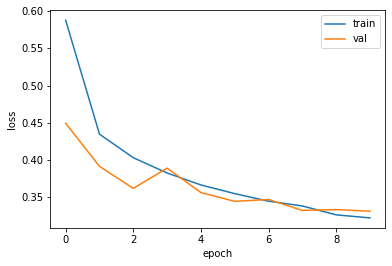

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

조기 종료가 수행된 모델을 사용하여 검증 데이터 세트에 대한 성능을 확인해 보겠습니다.

In [26]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3309 - accuracy: 0.8825


[0.3308548331260681, 0.8824999928474426]

이처럼 조기 종료를 수행하면 에포크 횟수를 크게 지정해도 좋습니다.